# Laboratory work 5: numerical integration

---

## Work objective:

Given a function $f(x)$ defined on segment $[a; b]$, compute $\int_{a}^{b} f(x)dx$ using:

1) trapezoidal rule;
2) refine the result by using Richardson extrapolation;
3) compare refined result with the one gained from Simpson method.

Given a function $g(x)$ defined of segment $[a; b]$, compute $\int_{a}^{b} g(x)\sin{(kx)}dx$ using
spline interpolation.

## Given functions

|   x   |   f(x)   |
|:-----:|:--------:|
| 0.00  | 1.000000 |
| 0.25  | 0.989616 |
| 0.50  | 0.958851 |
| 0.75  | 0.908852 |
| 1.00  | 0.841471 |
| 1.25  | 0.759188 |
| 1.50  | 0.664997 |
| 1.75  | 0.562278 |
| 2.00  | 0.454649 |

Actually, if we look in the answers section of this task, we will find that $f(x) = \frac{\sin{x}}{x}$.
So we will compute its values instead of using precomputed ones.

| x  |  g(x)   |
|:--:|:-------:|
| 0  | 0.00000 |
| 1  | 0.50000 |
| 2  | 0.86603 |
| 3  | 0.10000 |
| 4  | 0.86603 |

$k = 50$

---

## Imports

In [189]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

## Trapezoidal rule

In [190]:
def trapezoidal_rule(f, a, b, N):

    x = np.linspace(a, b, N + 1)
    step = (b - a) / N

    return step * sum ((f(x[i + 1]) + f(x[i])) / 2 for i in range(len(x) - 1))

## Richardson extrapolation

In [191]:
def richardson_extrapolation(method, approx_order, f, a, b, N):

    if N % 2 != 0:
        raise RuntimeError("The number of segments [a; b] is divided into must be an even number")

    I_h = method(f, a, b, N)
    I_2h = method(f, a, b, N // 2)

    return I_h + (I_h - I_2h) / (2 ** approx_order - 1)

## Simpson method

In [192]:
def simpson_rule(f, a, b, N):

    if N % 2 != 0:
        raise RuntimeError("The number of segments [a; b] is divided into must be an even number")

    x = np.linspace(a, b, N + 1)

    step = (b - a) / N
    sum_1 = sum(f(x[2 * i]) for i in range(1, N // 2))
    sum_2 = sum(f(x[2 * i - 1]) for i in range(1, N // 2 + 1))

    return (step / 3) * (f(x[0]) + f(x[N]) + 2 * sum_1 + 4 * sum_2)

## Results

In [193]:
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

a = 0
b = 2
N = 8
trapezoidal_approx_order = 2

I_h = trapezoidal_rule(sinc, a, b, N)
I_2h = trapezoidal_rule(sinc, a, b, N // 2)
I_r = richardson_extrapolation(trapezoidal_rule, trapezoidal_approx_order, sinc, a, b, N)
I_s = simpson_rule(sinc, a, b, N)

print(f"Trapezoidal rule with step {(b - a) / N}: {I_h}")
print(f"Trapezoidal rule with step {2 * (b - a) / N}: {I_2h}")
print(f"Richardson extrapolation: {I_r}")
print(f"Simpson's rule: {I_s}")

print(f"\nDifference between Simpson's rule and Richardson extrapolation: {abs(I_r - I_s)}")

Trapezoidal rule with step 0.25: 1.603143993230099
Trapezoidal rule with step 0.5: 1.5963215382293798
Richardson extrapolation: 1.6054181448970055
Simpson's rule: 1.6054181448970053

Difference between Simpson's rule and Richardson extrapolation: 2.220446049250313e-16


## Fast oscillating function

In [194]:
class Fast_Oscillating_Func:

    def __init__(self, x, f, k):
        self._cs = interpolate.CubicSpline(x, f, bc_type = "natural")
        self._k = k

    def __call__(self, x):
        return self._cs(x) * np.sin(self._k * x)

## Results

In [195]:
a = 0
b = 4
x = np.linspace(a, b, 5)
g = np.array([0, 0.5, 0.86603, 1, 0.86603])
k = 50
N = 1000

fof = Fast_Oscillating_Func(x, g, k)

I_h = trapezoidal_rule(fof, a, b, N)
I_2h = trapezoidal_rule(fof, a, b, N // 2)
I_r = richardson_extrapolation(trapezoidal_rule, trapezoidal_approx_order, fof, a, b, N)
I_s = simpson_rule(fof, a, b, N)

print(f"Trapezoidal rule with step {(b - a) / N}: {I_h}")
print(f"Trapezoidal rule with step {2 * (b - a) / N}: {I_2h}")
print(f"Richardson extrapolation: {I_r}")
print(f"Simpson's rule: {I_s}")

print(f"\nDifference between Simpson's rule and Richardson extrapolation: {abs(I_r - I_s)}")

Trapezoidal rule with step 0.004: -0.00834310288956845
Trapezoidal rule with step 0.008: -0.008257760773660649
Richardson extrapolation: -0.008371550261537717
Simpson's rule: -0.008371550261537759

Difference between Simpson's rule and Richardson extrapolation: 4.163336342344337e-17


Let's also visualize $g(x)$ and $f^{*}(x)$ that is interpolated $f(x)$:

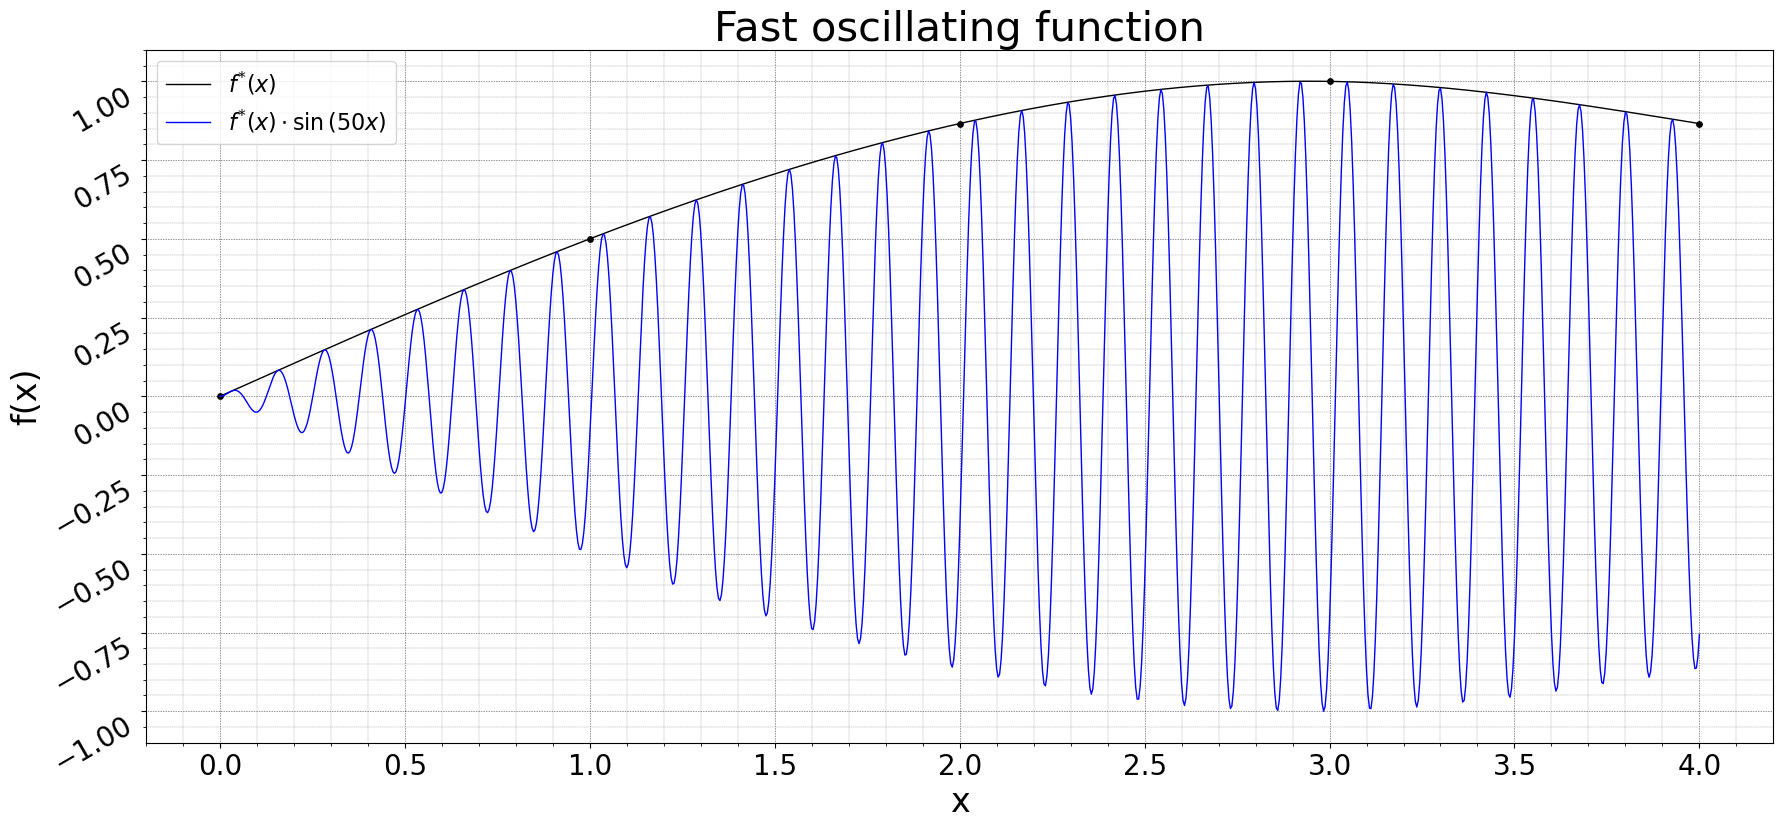

In [196]:
x_ = np.linspace(a, b, N + 1)
cs = interpolate.CubicSpline(x, f, bc_type = "natural")

plt.figure(figsize = (21, 9), dpi = 100)
plt.title("Fast oscillating function", fontsize = 30)

plt.xlabel("x", fontsize = 24)
plt.xticks(fontsize =  20, ha = "center", va = "top")

plt.ylabel("f(x)", fontsize = 24)
plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.scatter(x, g, s = 15, color = "black")
plt.plot(x_, cs(x_), linewidth = 1, color = "black", label = "$f^{*}(x)$")
plt.plot(x_, fof(x_), linewidth = 1, color = "blue", label = f"$f^{{*}}(x) \cdot \\sin{{({k}x)}}$")

plt.legend(loc = "best", fontsize = 16)

plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
plt.minorticks_on()
plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

plt.show()

## Conclusion

We see that results of calculation the integral by Richardson extrapolation and Simpson's rule are
equal with good accuracy as expected.